In [0]:
!pip uninstall tensorflow
!pip install tensorflow==2.1.0
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_gpu_available() == True)

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 421.8MB 20kB/s 
     |████████████████████████████████| 450kB 47.0MB/s 
     |████████████████████████████████| 3.9MB 46.4MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Succes

In [0]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import plot_model
import pandas as pd
from scipy.stats import norm
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'celeb'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

In [0]:
os.environ['KAGGLE_USERNAME'] = 'kimhaggie' # 독자의 캐글 ID
os.environ['KAGGLE_KEY'] = 'bf6a513484128eb597cf644e867f53d7' # 독자의 캐글 API Token

In [0]:
!kaggle datasets download -d jessicali9530/celeba-dataset

 99% 1.31G/1.33G [00:07<00:00, 218MB/s]
100% 1.33G/1.33G [00:07<00:00, 180MB/s]


In [0]:
!unzip celeba-dataset.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/197619.jpg  
  inflating: img_align_celeba/img_align_celeba/197620.jpg  
  in

In [0]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

In [0]:
def load_celeb(data_name, image_size, batch_size):
    data_folder = data_name

    data_gen = ImageDataGenerator(preprocessing_function=lambda x: (x.astype('float32') - 127.5) / 127.5)

    x_train = data_gen.flow_from_directory(data_folder
                                            , target_size = (image_size,image_size)
                                            , batch_size = batch_size
                                            , shuffle = True
                                            , class_mode = 'input'
                                            , subset = "training"
                                                )

    return x_train

In [0]:
x_train = load_celeb('img_align_celeba',IMAGE_SIZE,BATCH_SIZE)

Found 202599 images belonging to 1 classes.


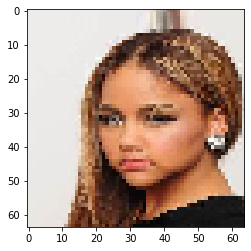

In [0]:
plt.imshow((x_train[0][0][0]+1)/2)

In [0]:
!pip uninstall tqdm

Found existing installation: tqdm 4.43.0
Uninstalling tqdm-4.43.0:
  Would remove:
    /home/haggie/anaconda3/envs/tensorflow/bin/tqdm
    /home/haggie/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tqdm-4.43.0.dist-info/*
    /home/haggie/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tqdm/*
Proceed (y/n)? ^C
ERROR: Operation cancelled by user


In [0]:
!pip install tqdm

     |████████████████████████████████| 61kB 9.0MB/s 


In [0]:
from tqdm.autonotebook import tqdm
import shutil

/home/haggie/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  """Entry point for launching an IPython kernel.


In [0]:
def get_terminal_width():
    width = shutil.get_terminal_size(fallback=(200, 24))[0]
    if width == 0:
        width = 120
    return width

def pbar(total_images, batch_size, epoch, epochs):
    bar = tqdm(total=(total_images // batch_size) * batch_size,
               ncols=int(get_terminal_width() * .9),
               desc=tqdm.write(f'Epoch {epoch + 1}/{epochs}'),
               postfix={
                   'g_loss': f'{0:6.3f}',
                   'd_loss': f'{0:6.3f}',
                   1: 1
               },
               bar_format='{n_fmt}/{total_fmt} |{bar}| {rate_fmt}  '
               'ETA: {remaining}  Elapsed Time: {elapsed}  '
               'G Loss: {postfix[g_loss]}  D Loss: {postfix['
               'd_loss]}',
               unit=' images',
               miniters=10)
    return bar

In [0]:
def d_loss_fn(f_logit, r_logit):
    f_loss = tf.reduce_mean(f_logit)
    r_loss = tf.reduce_mean(r_logit)
    return f_loss - r_loss


def g_loss_fn(f_logit):
    f_loss = -tf.reduce_mean(f_logit)
    return f_loss

In [0]:
from tensorflow.python.keras import metrics
from tensorflow import random

class WGANGP:
    def __init__(self
        , input_dim
        , critic_conv_filters
        , critic_conv_kernel_size
        , critic_conv_strides
        , critic_batch_norm_momentum
        , critic_activation
        , critic_dropout_rate
        , critic_learning_rate
        , generator_initial_dense_layer_size
        , generator_upsample
        , generator_conv_filters
        , generator_conv_kernel_size
        , generator_conv_strides
        , generator_batch_norm_momentum
        , generator_activation
        , generator_dropout_rate
        , generator_learning_rate
        , optimiser
        , grad_weight
        , z_dim
        , batch_size
        , total_image_size
        ):
        self.name = 'gan'

        self.input_dim = input_dim
        self.critic_conv_filters = critic_conv_filters
        self.critic_conv_kernel_size = critic_conv_kernel_size
        self.critic_conv_strides = critic_conv_strides
        self.critic_batch_norm_momentum = critic_batch_norm_momentum
        self.critic_activation = critic_activation
        self.critic_dropout_rate = critic_dropout_rate
        self.critic_learning_rate = critic_learning_rate

        self.generator_initial_dense_layer_size = generator_initial_dense_layer_size
        self.generator_upsample = generator_upsample
        self.generator_conv_filters = generator_conv_filters
        self.generator_conv_kernel_size = generator_conv_kernel_size
        self.generator_conv_strides = generator_conv_strides
        self.generator_batch_norm_momentum = generator_batch_norm_momentum
        self.generator_activation = generator_activation
        self.generator_dropout_rate = generator_dropout_rate
        self.generator_learning_rate = generator_learning_rate
        
        self.optimiser = optimiser

        self.z_dim = z_dim

        self.n_layers_critic = len(critic_conv_filters)
        self.n_layers_generator = len(generator_conv_filters)

        self.weight_init = tf.keras.initializers.RandomNormal(mean=0., stddev=0.02) # 'he_normal' #RandomNormal(mean=0., stddev=0.02)
        self.grad_penalty_weight = grad_weight
        self.batch_size = batch_size
        self.total_image_size = total_image_size

        self.d_losses = []
        self.g_losses = []
        self.epoch = 0

        self._build_critic()
        self._build_generator() 

        self.compile()   

    def get_activation(self, activation):
        if activation == 'leaky_relu':
            layer = tf.keras.layers.LeakyReLU(alpha = 0.2)
        else:
            layer = tf.keras.layers.Activation(activation)
        return layer

    def compile(self):
        self.d_opt = tf.keras.optimizers.Adam(lr=0.0001)
        self.g_opt = tf.keras.optimizers.Adam(lr=0.0001)

    def _build_generator(self):

        ### THE generator

        generator_input = tf.keras.layers.Input(shape=(1,1,self.z_dim), name='generator_input')

        x = generator_input

        x = tf.keras.layers.Dense(np.prod(self.generator_initial_dense_layer_size), kernel_initializer = self.weight_init)(x)
        if self.generator_batch_norm_momentum:
            x = tf.keras.layers.BatchNormalization(momentum = self.generator_batch_norm_momentum)(x)
        
        x = self.get_activation(self.generator_activation)(x)

        x = tf.keras.layers.Reshape(self.generator_initial_dense_layer_size)(x)

        if self.generator_dropout_rate:
            x = tf.keras.layers.Dropout(rate = self.generator_dropout_rate)(x)

        for i in range(self.n_layers_generator):

            if self.generator_upsample[i] == 2:
                x = tf.keras.layers.UpSampling2D()(x)
                x = tf.keras.layers.Conv2D(
                filters = self.generator_conv_filters[i]
                , kernel_size = self.generator_conv_kernel_size[i]
                , padding = 'same'
                , name = 'generator_conv_' + str(i)
                , kernel_initializer = self.weight_init
                )(x)
            else:

                x = tf.keras.layers.Conv2DTranspose(
                    filters = self.generator_conv_filters[i]
                    , kernel_size = self.generator_conv_kernel_size[i]
                    , padding = 'same'
                    , strides = self.generator_conv_strides[i]
                    , name = 'generator_conv_' + str(i)
                    , kernel_initializer = self.weight_init
                    )(x)

            if i < self.n_layers_generator - 1:

                if self.generator_batch_norm_momentum:
                    x = tf.keras.layers.BatchNormalization(momentum = self.generator_batch_norm_momentum)(x)

                x = self.get_activation(self.generator_activation)(x)
                
            else:
                x = tf.keras.layers.Activation('tanh')(x)

        generator_output = x
        self.generator = tf.keras.Model(generator_input, generator_output)

    def _build_critic(self):

        ### THE critic
        critic_input = tf.keras.layers.Input(shape=self.input_dim, name='critic_input')

        x = critic_input

        for i in range(self.n_layers_critic):

            x = tf.keras.layers.Conv2D(
                filters = self.critic_conv_filters[i]
                , kernel_size = self.critic_conv_kernel_size[i]
                , strides = self.critic_conv_strides[i]
                , padding = 'same'
                , name = 'critic_conv_' + str(i)
                , kernel_initializer = self.weight_init
                )(x)

            if self.critic_batch_norm_momentum and i > 0:
                x = tf.keras.layers.BatchNormalization(momentum = self.critic_batch_norm_momentum)(x)

            x = self.get_activation(self.critic_activation)(x)

            if self.critic_dropout_rate:
                x = tf.keras.layers.Dropout(rate = self.critic_dropout_rate)(x)

        x = tf.keras.layers.Flatten()(x)

        # x = Dense(512, kernel_initializer = self.weight_init)(x)

        # x = self.get_activation(self.critic_activation)(x)
        
        critic_output = tf.keras.layers.Dense(1, activation=None
        , kernel_initializer = self.weight_init
        )(x)

        self.critic = tf.keras.Model(critic_input, critic_output)

    def train(self, x_train, batch_size, epochs,run_folder, print_every_n_batches=100,n_critic=5):
        for epoch in range(epochs):
            if epoch % 100 == 0:
                critic_loops = 5
            else:
                critic_loops = n_critic
            for _ in range(critic_loops):
                d_loss = self.train_d(x_train)
            
            g_loss = self.train_g()

            print ("%d (%d, %d) [D loss: (%.1f)] [G loss: %.1f]" % (epoch, critic_loops, 1, d_loss,g_loss))
            self.d_losses.append(d_loss)
            self.g_losses.append(g_loss)
            
            if epoch % print_every_n_batches == 0:
                self.sample_images(run_folder,epoch)

    def sample_images(self, run_folder, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c,1,1, self.z_dim))
        gen_imgs = self.generator.predict(noise)
        #Rescale images 0 - 1

        gen_imgs = 0.5 * (gen_imgs + 1)
        gen_imgs = np.clip(gen_imgs, 0, 1)

        fig, axs = plt.subplots(r, c, figsize=(15,15))
        cnt = 0

        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :,:,:]), cmap = 'gray_r')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig(os.path.join(run_folder, "images/sample_%d.png" % epoch))
        plt.close()

    def gradient_penalty(self, f, real, fake):
        alpha = random.uniform([self.batch_size, 1, 1, 1], 0., 1.)
        diff = fake - real
        inter = real + (alpha * diff)
        with tf.GradientTape() as t:
            t.watch(inter)
            pred = f(inter)
        grad = t.gradient(pred, [inter])[0]
        slopes = tf.sqrt(tf.reduce_sum(tf.square(grad), axis=[1, 2, 3]))
        gp = tf.reduce_mean((slopes - 1.)**2)
        return gp

    @tf.function
    def train_d(self,x_real):
        z = random.normal((self.batch_size, 1, 1, self.z_dim))
        with tf.GradientTape() as t:
            x_fake = self.generator(z, training=False)
            fake_logits = self.critic(x_fake, training=True)
            true_imgs=next(x_real)[0]
            real_logits = self.critic(true_imgs, training=True)
            cost = d_loss_fn(fake_logits, real_logits)
            gp = self.gradient_penalty(partial(self.critic, training=True), true_imgs, x_fake)
            cost += self.grad_penalty_weight * gp
        grad = t.gradient(cost, self.critic.trainable_variables)
        self.d_opt.apply_gradients(zip(grad, self.critic.trainable_variables))
        return cost

    @tf.function
    def train_g(self):
        z = random.normal((self.batch_size, 1, 1, self.z_dim))
        with tf.GradientTape() as t:
            x_fake = self.generator(z, training=True)
            fake_logits = self.critic(x_fake, training=True)
            loss = g_loss_fn(fake_logits)
        grad = t.gradient(loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(grad, self.generator.trainable_variables))
        return loss

In [0]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        , total_image_size = 202599
        )

In [0]:
from functools import partial
EPOCHS = 5000
PRINT_EVERY_N_BATCHES = 100
N_CRITIC = 5
BATCH_SIZE = 64

In [0]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
)

0 (5, 1) [D loss: (-138.5)] [G loss: -51.9]
1 (5, 1) [D loss: (-143.8)] [G loss: -54.4]
2 (5, 1) [D loss: (-144.3)] [G loss: -61.6]
3 (5, 1) [D loss: (-147.3)] [G loss: -58.6]
4 (5, 1) [D loss: (-143.9)] [G loss: -52.8]
5 (5, 1) [D loss: (-145.8)] [G loss: -50.0]
6 (5, 1) [D loss: (-146.6)] [G loss: -45.5]
7 (5, 1) [D loss: (-148.6)] [G loss: -39.2]
8 (5, 1) [D loss: (-148.0)] [G loss: -30.0]
9 (5, 1) [D loss: (-155.3)] [G loss: -23.1]
10 (5, 1) [D loss: (-154.3)] [G loss: -12.5]
11 (5, 1) [D loss: (-153.7)] [G loss: -2.9]
12 (5, 1) [D loss: (-154.9)] [G loss: 7.9]
13 (5, 1) [D loss: (-161.2)] [G loss: 22.3]
14 (5, 1) [D loss: (-171.6)] [G loss: 31.5]
15 (5, 1) [D loss: (-173.3)] [G loss: 31.2]
16 (5, 1) [D loss: (-164.8)] [G loss: 34.5]
17 (5, 1) [D loss: (-162.5)] [G loss: 47.0]
18 (5, 1) [D loss: (-163.7)] [G loss: 51.6]
19 (5, 1) [D loss: (-169.5)] [G loss: 49.8]
20 (5, 1) [D loss: (-166.4)] [G loss: 55.8]
21 (5, 1) [D loss: (-172.4)] [G loss: 44.8]
22 (5, 1) [D loss: (-167.5)] [G 

182 (5, 1) [D loss: (-54.3)] [G loss: -104.5]
183 (5, 1) [D loss: (-47.6)] [G loss: -104.8]
184 (5, 1) [D loss: (-54.2)] [G loss: -103.4]
185 (5, 1) [D loss: (-48.8)] [G loss: -90.5]
186 (5, 1) [D loss: (-46.8)] [G loss: -99.0]
187 (5, 1) [D loss: (-46.2)] [G loss: -106.3]
188 (5, 1) [D loss: (-48.0)] [G loss: -112.6]
189 (5, 1) [D loss: (-47.2)] [G loss: -107.1]
190 (5, 1) [D loss: (-42.7)] [G loss: -120.0]
191 (5, 1) [D loss: (-44.3)] [G loss: -103.9]
192 (5, 1) [D loss: (-45.6)] [G loss: -119.2]
193 (5, 1) [D loss: (-42.6)] [G loss: -115.4]
194 (5, 1) [D loss: (-44.4)] [G loss: -109.8]
195 (5, 1) [D loss: (-49.1)] [G loss: -128.6]
196 (5, 1) [D loss: (-47.7)] [G loss: -106.3]
197 (5, 1) [D loss: (-45.9)] [G loss: -117.0]
198 (5, 1) [D loss: (-43.5)] [G loss: -133.6]
199 (5, 1) [D loss: (-40.9)] [G loss: -92.3]
200 (5, 1) [D loss: (-43.3)] [G loss: -126.8]
201 (5, 1) [D loss: (-42.9)] [G loss: -128.8]
202 (5, 1) [D loss: (-41.9)] [G loss: -97.6]
203 (5, 1) [D loss: (-42.4)] [G loss: 

362 (5, 1) [D loss: (-62.0)] [G loss: -109.2]
363 (5, 1) [D loss: (-49.6)] [G loss: -108.7]
364 (5, 1) [D loss: (-48.9)] [G loss: -109.9]
365 (5, 1) [D loss: (-50.1)] [G loss: -100.7]
366 (5, 1) [D loss: (-50.4)] [G loss: -101.1]
367 (5, 1) [D loss: (-49.7)] [G loss: -120.5]
368 (5, 1) [D loss: (-39.8)] [G loss: -116.1]
369 (5, 1) [D loss: (-52.4)] [G loss: -119.1]
370 (5, 1) [D loss: (-48.9)] [G loss: -118.0]
371 (5, 1) [D loss: (-48.4)] [G loss: -120.6]
372 (5, 1) [D loss: (-42.1)] [G loss: -122.2]
373 (5, 1) [D loss: (-45.5)] [G loss: -133.9]
374 (5, 1) [D loss: (-40.1)] [G loss: -135.6]
375 (5, 1) [D loss: (-45.3)] [G loss: -134.2]
376 (5, 1) [D loss: (-41.7)] [G loss: -120.9]
377 (5, 1) [D loss: (-35.0)] [G loss: -141.4]
378 (5, 1) [D loss: (-37.8)] [G loss: -156.1]
379 (5, 1) [D loss: (-33.9)] [G loss: -132.4]
380 (5, 1) [D loss: (-39.1)] [G loss: -142.4]
381 (5, 1) [D loss: (-39.8)] [G loss: -133.7]
382 (5, 1) [D loss: (-39.0)] [G loss: -141.7]
383 (5, 1) [D loss: (-38.0)] [G lo

541 (5, 1) [D loss: (-40.1)] [G loss: -77.9]
542 (5, 1) [D loss: (-34.8)] [G loss: -70.0]
543 (5, 1) [D loss: (-42.4)] [G loss: -73.0]
544 (5, 1) [D loss: (-40.8)] [G loss: -99.6]
545 (5, 1) [D loss: (-39.4)] [G loss: -120.4]
546 (5, 1) [D loss: (-46.3)] [G loss: -110.6]
547 (5, 1) [D loss: (-39.7)] [G loss: -113.8]
548 (5, 1) [D loss: (-40.1)] [G loss: -111.5]
549 (5, 1) [D loss: (-37.1)] [G loss: -106.4]
550 (5, 1) [D loss: (-36.8)] [G loss: -124.2]
551 (5, 1) [D loss: (-39.1)] [G loss: -130.0]
552 (5, 1) [D loss: (-41.7)] [G loss: -120.0]
553 (5, 1) [D loss: (-41.0)] [G loss: -130.9]
554 (5, 1) [D loss: (-40.4)] [G loss: -146.1]
555 (5, 1) [D loss: (-42.0)] [G loss: -149.7]
556 (5, 1) [D loss: (-38.6)] [G loss: -149.6]
557 (5, 1) [D loss: (-40.8)] [G loss: -137.0]
558 (5, 1) [D loss: (-42.7)] [G loss: -151.5]
559 (5, 1) [D loss: (-39.9)] [G loss: -162.3]
560 (5, 1) [D loss: (-42.0)] [G loss: -152.6]
561 (5, 1) [D loss: (-40.5)] [G loss: -137.2]
562 (5, 1) [D loss: (-32.3)] [G loss: 

721 (5, 1) [D loss: (-58.1)] [G loss: -129.3]
722 (5, 1) [D loss: (-48.3)] [G loss: -147.4]
723 (5, 1) [D loss: (-49.3)] [G loss: -147.9]
724 (5, 1) [D loss: (-48.9)] [G loss: -124.9]
725 (5, 1) [D loss: (-40.1)] [G loss: -142.6]
726 (5, 1) [D loss: (-49.1)] [G loss: -154.3]
727 (5, 1) [D loss: (-57.9)] [G loss: -155.7]
728 (5, 1) [D loss: (-43.8)] [G loss: -158.3]
729 (5, 1) [D loss: (-55.7)] [G loss: -145.6]
730 (5, 1) [D loss: (-55.0)] [G loss: -140.3]
731 (5, 1) [D loss: (-61.2)] [G loss: -162.8]
732 (5, 1) [D loss: (-62.1)] [G loss: -149.8]
733 (5, 1) [D loss: (-68.2)] [G loss: -190.4]
734 (5, 1) [D loss: (-56.9)] [G loss: -174.7]
735 (5, 1) [D loss: (-56.4)] [G loss: -184.0]
736 (5, 1) [D loss: (-56.0)] [G loss: -179.5]
737 (5, 1) [D loss: (-38.0)] [G loss: -183.6]
738 (5, 1) [D loss: (-51.4)] [G loss: -178.3]
739 (5, 1) [D loss: (-48.2)] [G loss: -157.1]
740 (5, 1) [D loss: (-54.0)] [G loss: -173.0]
741 (5, 1) [D loss: (-44.9)] [G loss: -164.4]
742 (5, 1) [D loss: (-52.0)] [G lo

902 (5, 1) [D loss: (-59.4)] [G loss: -99.6]
903 (5, 1) [D loss: (-52.0)] [G loss: -115.1]
904 (5, 1) [D loss: (-68.5)] [G loss: -108.6]
905 (5, 1) [D loss: (-59.0)] [G loss: -115.3]
906 (5, 1) [D loss: (-55.9)] [G loss: -112.6]
907 (5, 1) [D loss: (-57.0)] [G loss: -115.2]
908 (5, 1) [D loss: (-61.3)] [G loss: -108.1]
909 (5, 1) [D loss: (-52.7)] [G loss: -121.9]
910 (5, 1) [D loss: (-58.7)] [G loss: -130.8]
911 (5, 1) [D loss: (-53.8)] [G loss: -114.4]
912 (5, 1) [D loss: (-59.6)] [G loss: -112.4]
913 (5, 1) [D loss: (-66.5)] [G loss: -114.6]
914 (5, 1) [D loss: (-61.8)] [G loss: -155.3]
915 (5, 1) [D loss: (-71.2)] [G loss: -142.2]
916 (5, 1) [D loss: (-67.6)] [G loss: -133.9]
917 (5, 1) [D loss: (-58.3)] [G loss: -128.4]
918 (5, 1) [D loss: (-54.1)] [G loss: -129.3]
919 (5, 1) [D loss: (-58.6)] [G loss: -144.8]
920 (5, 1) [D loss: (-57.8)] [G loss: -157.1]
921 (5, 1) [D loss: (-57.1)] [G loss: -152.1]
922 (5, 1) [D loss: (-54.5)] [G loss: -156.0]
923 (5, 1) [D loss: (-60.2)] [G los

1080 (5, 1) [D loss: (-58.6)] [G loss: -74.9]
1081 (5, 1) [D loss: (-59.8)] [G loss: -77.6]
1082 (5, 1) [D loss: (-57.8)] [G loss: -86.2]
1083 (5, 1) [D loss: (-60.6)] [G loss: -82.7]
1084 (5, 1) [D loss: (-58.0)] [G loss: -60.7]
1085 (5, 1) [D loss: (-60.2)] [G loss: -56.4]
1086 (5, 1) [D loss: (-63.1)] [G loss: -78.2]
1087 (5, 1) [D loss: (-62.9)] [G loss: -82.0]
1088 (5, 1) [D loss: (-60.7)] [G loss: -76.3]
1089 (5, 1) [D loss: (-62.0)] [G loss: -79.9]
1090 (5, 1) [D loss: (-62.5)] [G loss: -84.8]
1091 (5, 1) [D loss: (-60.9)] [G loss: -91.1]
1092 (5, 1) [D loss: (-63.6)] [G loss: -79.1]
1093 (5, 1) [D loss: (-59.0)] [G loss: -73.8]
1094 (5, 1) [D loss: (-56.0)] [G loss: -68.7]
1095 (5, 1) [D loss: (-57.7)] [G loss: -48.2]
1096 (5, 1) [D loss: (-59.9)] [G loss: -59.7]
1097 (5, 1) [D loss: (-64.6)] [G loss: -64.2]
1098 (5, 1) [D loss: (-57.3)] [G loss: -59.0]
1099 (5, 1) [D loss: (-62.2)] [G loss: -62.2]
1100 (5, 1) [D loss: (-60.2)] [G loss: -62.1]
1101 (5, 1) [D loss: (-61.5)] [G l

1258 (5, 1) [D loss: (-66.5)] [G loss: -79.4]
1259 (5, 1) [D loss: (-70.3)] [G loss: -75.5]
1260 (5, 1) [D loss: (-70.9)] [G loss: -80.1]
1261 (5, 1) [D loss: (-67.7)] [G loss: -80.1]
1262 (5, 1) [D loss: (-68.4)] [G loss: -67.1]
1263 (5, 1) [D loss: (-69.9)] [G loss: -66.0]
1264 (5, 1) [D loss: (-67.8)] [G loss: -76.1]
1265 (5, 1) [D loss: (-68.1)] [G loss: -83.1]
1266 (5, 1) [D loss: (-73.1)] [G loss: -84.7]
1267 (5, 1) [D loss: (-67.3)] [G loss: -87.0]
1268 (5, 1) [D loss: (-65.7)] [G loss: -79.1]
1269 (5, 1) [D loss: (-72.3)] [G loss: -90.1]
1270 (5, 1) [D loss: (-66.1)] [G loss: -99.6]
1271 (5, 1) [D loss: (-69.7)] [G loss: -104.2]
1272 (5, 1) [D loss: (-66.9)] [G loss: -95.3]
1273 (5, 1) [D loss: (-69.4)] [G loss: -94.0]
1274 (5, 1) [D loss: (-68.2)] [G loss: -98.3]
1275 (5, 1) [D loss: (-71.5)] [G loss: -94.6]
1276 (5, 1) [D loss: (-74.0)] [G loss: -103.0]
1277 (5, 1) [D loss: (-59.9)] [G loss: -113.2]
1278 (5, 1) [D loss: (-64.5)] [G loss: -104.7]
1279 (5, 1) [D loss: (-68.1)] 

1436 (5, 1) [D loss: (-71.6)] [G loss: -74.8]
1437 (5, 1) [D loss: (-70.2)] [G loss: -67.9]
1438 (5, 1) [D loss: (-66.7)] [G loss: -69.0]
1439 (5, 1) [D loss: (-78.5)] [G loss: -71.1]
1440 (5, 1) [D loss: (-70.4)] [G loss: -55.7]
1441 (5, 1) [D loss: (-68.3)] [G loss: -60.3]
1442 (5, 1) [D loss: (-74.2)] [G loss: -64.9]
1443 (5, 1) [D loss: (-76.3)] [G loss: -67.3]
1444 (5, 1) [D loss: (-74.1)] [G loss: -54.3]
1445 (5, 1) [D loss: (-74.7)] [G loss: -52.7]
1446 (5, 1) [D loss: (-81.3)] [G loss: -55.1]
1447 (5, 1) [D loss: (-61.1)] [G loss: -63.3]
1448 (5, 1) [D loss: (-70.9)] [G loss: -54.8]
1449 (5, 1) [D loss: (-79.8)] [G loss: -57.4]
1450 (5, 1) [D loss: (-77.3)] [G loss: -66.6]
1451 (5, 1) [D loss: (-71.6)] [G loss: -56.0]
1452 (5, 1) [D loss: (-76.6)] [G loss: -55.6]
1453 (5, 1) [D loss: (-71.2)] [G loss: -47.4]
1454 (5, 1) [D loss: (-78.5)] [G loss: -46.4]
1455 (5, 1) [D loss: (-68.3)] [G loss: -59.6]
1456 (5, 1) [D loss: (-71.3)] [G loss: -62.7]
1457 (5, 1) [D loss: (-70.3)] [G l

1614 (5, 1) [D loss: (-78.2)] [G loss: -27.7]
1615 (5, 1) [D loss: (-90.6)] [G loss: -23.8]
1616 (5, 1) [D loss: (-83.4)] [G loss: -33.0]
1617 (5, 1) [D loss: (-75.6)] [G loss: -25.9]
1618 (5, 1) [D loss: (-95.6)] [G loss: -19.1]
1619 (5, 1) [D loss: (-95.1)] [G loss: -21.1]
1620 (5, 1) [D loss: (-95.9)] [G loss: -18.0]
1621 (5, 1) [D loss: (-82.7)] [G loss: -19.0]
1622 (5, 1) [D loss: (-69.4)] [G loss: -13.4]
1623 (5, 1) [D loss: (-81.8)] [G loss: -19.0]
1624 (5, 1) [D loss: (-104.1)] [G loss: -15.0]
1625 (5, 1) [D loss: (-87.5)] [G loss: -7.8]
1626 (5, 1) [D loss: (-80.9)] [G loss: -9.4]
1627 (5, 1) [D loss: (-90.9)] [G loss: -16.6]
1628 (5, 1) [D loss: (-100.0)] [G loss: -4.3]
1629 (5, 1) [D loss: (-77.3)] [G loss: -14.0]
1630 (5, 1) [D loss: (-83.9)] [G loss: -11.3]
1631 (5, 1) [D loss: (-78.1)] [G loss: -15.9]
1632 (5, 1) [D loss: (-87.8)] [G loss: -18.9]
1633 (5, 1) [D loss: (-80.7)] [G loss: -22.2]
1634 (5, 1) [D loss: (-83.4)] [G loss: -9.1]
1635 (5, 1) [D loss: (-79.8)] [G los

1793 (5, 1) [D loss: (-72.1)] [G loss: -45.8]
1794 (5, 1) [D loss: (-71.0)] [G loss: -47.2]
1795 (5, 1) [D loss: (-70.2)] [G loss: -43.5]
1796 (5, 1) [D loss: (-73.5)] [G loss: -37.0]
1797 (5, 1) [D loss: (-75.1)] [G loss: -31.8]
1798 (5, 1) [D loss: (-73.2)] [G loss: -40.5]
1799 (5, 1) [D loss: (-77.6)] [G loss: -41.3]
1800 (5, 1) [D loss: (-70.6)] [G loss: -39.2]
1801 (5, 1) [D loss: (-79.8)] [G loss: -39.0]
1802 (5, 1) [D loss: (-73.4)] [G loss: -36.8]
1803 (5, 1) [D loss: (-76.9)] [G loss: -40.5]
1804 (5, 1) [D loss: (-74.2)] [G loss: -39.6]
1805 (5, 1) [D loss: (-78.4)] [G loss: -39.9]
1806 (5, 1) [D loss: (-72.2)] [G loss: -35.5]
1807 (5, 1) [D loss: (-71.7)] [G loss: -43.4]
1808 (5, 1) [D loss: (-83.3)] [G loss: -42.8]
1809 (5, 1) [D loss: (-77.2)] [G loss: -53.1]
1810 (5, 1) [D loss: (-78.4)] [G loss: -48.1]
1811 (5, 1) [D loss: (-77.9)] [G loss: -45.4]
1812 (5, 1) [D loss: (-77.9)] [G loss: -45.8]
1813 (5, 1) [D loss: (-76.1)] [G loss: -49.8]
1814 (5, 1) [D loss: (-80.1)] [G l

1972 (5, 1) [D loss: (-74.7)] [G loss: -21.3]
1973 (5, 1) [D loss: (-70.3)] [G loss: -23.2]
1974 (5, 1) [D loss: (-81.3)] [G loss: -24.0]
1975 (5, 1) [D loss: (-74.2)] [G loss: -30.7]
1976 (5, 1) [D loss: (-73.8)] [G loss: -25.0]
1977 (5, 1) [D loss: (-70.1)] [G loss: -23.3]
1978 (5, 1) [D loss: (-72.4)] [G loss: -29.0]
1979 (5, 1) [D loss: (-74.6)] [G loss: -32.7]
1980 (5, 1) [D loss: (-77.3)] [G loss: -31.2]
1981 (5, 1) [D loss: (-74.1)] [G loss: -31.8]
1982 (5, 1) [D loss: (-70.4)] [G loss: -28.4]
1983 (5, 1) [D loss: (-73.6)] [G loss: -26.8]
1984 (5, 1) [D loss: (-76.3)] [G loss: -21.7]
1985 (5, 1) [D loss: (-75.7)] [G loss: -26.0]
1986 (5, 1) [D loss: (-77.9)] [G loss: -20.3]
1987 (5, 1) [D loss: (-80.2)] [G loss: -19.4]
1988 (5, 1) [D loss: (-71.0)] [G loss: -24.6]
1989 (5, 1) [D loss: (-78.0)] [G loss: -23.3]
1990 (5, 1) [D loss: (-79.1)] [G loss: -20.3]
1991 (5, 1) [D loss: (-73.9)] [G loss: -27.9]
1992 (5, 1) [D loss: (-81.6)] [G loss: -25.2]
1993 (5, 1) [D loss: (-77.3)] [G l

2151 (5, 1) [D loss: (-78.7)] [G loss: -26.7]
2152 (5, 1) [D loss: (-79.9)] [G loss: -32.5]
2153 (5, 1) [D loss: (-82.6)] [G loss: -33.2]
2154 (5, 1) [D loss: (-82.0)] [G loss: -44.4]
2155 (5, 1) [D loss: (-75.8)] [G loss: -44.1]
2156 (5, 1) [D loss: (-81.9)] [G loss: -34.9]
2157 (5, 1) [D loss: (-82.7)] [G loss: -30.7]
2158 (5, 1) [D loss: (-72.3)] [G loss: -25.4]
2159 (5, 1) [D loss: (-76.6)] [G loss: -21.8]
2160 (5, 1) [D loss: (-81.2)] [G loss: -18.6]
2161 (5, 1) [D loss: (-73.4)] [G loss: -21.2]
2162 (5, 1) [D loss: (-77.1)] [G loss: -21.6]
2163 (5, 1) [D loss: (-74.4)] [G loss: -24.1]
2164 (5, 1) [D loss: (-72.9)] [G loss: -23.9]
2165 (5, 1) [D loss: (-74.7)] [G loss: -21.1]
2166 (5, 1) [D loss: (-72.1)] [G loss: -15.7]
2167 (5, 1) [D loss: (-74.1)] [G loss: -10.6]
2168 (5, 1) [D loss: (-70.9)] [G loss: -12.7]
2169 (5, 1) [D loss: (-76.2)] [G loss: -13.2]
2170 (5, 1) [D loss: (-69.5)] [G loss: -9.2]
2171 (5, 1) [D loss: (-71.8)] [G loss: -4.8]
2172 (5, 1) [D loss: (-76.6)] [G los

2333 (5, 1) [D loss: (-78.6)] [G loss: -9.5]
2334 (5, 1) [D loss: (-89.6)] [G loss: -15.1]
2335 (5, 1) [D loss: (-72.5)] [G loss: -14.6]
2336 (5, 1) [D loss: (-75.2)] [G loss: -14.4]
2337 (5, 1) [D loss: (-81.5)] [G loss: -11.5]
2338 (5, 1) [D loss: (-83.9)] [G loss: -10.6]
2339 (5, 1) [D loss: (-77.4)] [G loss: -13.2]
2340 (5, 1) [D loss: (-77.7)] [G loss: -6.0]
2341 (5, 1) [D loss: (-76.3)] [G loss: -5.0]
2342 (5, 1) [D loss: (-77.0)] [G loss: -2.2]
2343 (5, 1) [D loss: (-78.8)] [G loss: 4.6]
2344 (5, 1) [D loss: (-75.3)] [G loss: 6.5]
2345 (5, 1) [D loss: (-82.1)] [G loss: 0.8]
2346 (5, 1) [D loss: (-79.4)] [G loss: -1.2]
2347 (5, 1) [D loss: (-79.5)] [G loss: 0.5]
2348 (5, 1) [D loss: (-71.0)] [G loss: 5.5]
2349 (5, 1) [D loss: (-82.9)] [G loss: 8.6]
2350 (5, 1) [D loss: (-80.2)] [G loss: 5.6]
2351 (5, 1) [D loss: (-78.2)] [G loss: 8.5]
2352 (5, 1) [D loss: (-76.3)] [G loss: 5.4]
2353 (5, 1) [D loss: (-78.4)] [G loss: 7.0]
2354 (5, 1) [D loss: (-77.2)] [G loss: 9.8]
2355 (5, 1) [D 

2516 (5, 1) [D loss: (-79.1)] [G loss: -1.5]
2517 (5, 1) [D loss: (-80.5)] [G loss: -4.7]
2518 (5, 1) [D loss: (-79.7)] [G loss: -9.2]
2519 (5, 1) [D loss: (-79.6)] [G loss: 2.3]
2520 (5, 1) [D loss: (-74.7)] [G loss: 0.1]
2521 (5, 1) [D loss: (-80.1)] [G loss: 6.3]
2522 (5, 1) [D loss: (-75.9)] [G loss: 9.2]
2523 (5, 1) [D loss: (-79.4)] [G loss: 13.9]
2524 (5, 1) [D loss: (-76.2)] [G loss: 9.5]
2525 (5, 1) [D loss: (-83.8)] [G loss: 16.9]
2526 (5, 1) [D loss: (-87.0)] [G loss: 16.9]
2527 (5, 1) [D loss: (-76.8)] [G loss: 11.1]
2528 (5, 1) [D loss: (-74.1)] [G loss: 20.6]
2529 (5, 1) [D loss: (-75.6)] [G loss: 22.4]
2530 (5, 1) [D loss: (-82.2)] [G loss: 31.3]
2531 (5, 1) [D loss: (-82.9)] [G loss: 24.5]
2532 (5, 1) [D loss: (-79.9)] [G loss: 25.0]
2533 (5, 1) [D loss: (-78.8)] [G loss: 32.4]
2534 (5, 1) [D loss: (-83.2)] [G loss: 32.0]
2535 (5, 1) [D loss: (-82.2)] [G loss: 28.6]
2536 (5, 1) [D loss: (-82.1)] [G loss: 32.6]
2537 (5, 1) [D loss: (-78.8)] [G loss: 27.0]
2538 (5, 1) [D 

2699 (5, 1) [D loss: (-82.1)] [G loss: 35.2]
2700 (5, 1) [D loss: (-79.6)] [G loss: 39.7]
2701 (5, 1) [D loss: (-81.2)] [G loss: 43.8]
2702 (5, 1) [D loss: (-73.6)] [G loss: 45.3]
2703 (5, 1) [D loss: (-74.7)] [G loss: 42.7]
2704 (5, 1) [D loss: (-81.6)] [G loss: 42.2]
2705 (5, 1) [D loss: (-76.7)] [G loss: 39.8]
2706 (5, 1) [D loss: (-81.8)] [G loss: 45.4]
2707 (5, 1) [D loss: (-88.0)] [G loss: 49.4]
2708 (5, 1) [D loss: (-81.0)] [G loss: 46.3]
2709 (5, 1) [D loss: (-76.5)] [G loss: 48.1]
2710 (5, 1) [D loss: (-80.2)] [G loss: 49.2]
2711 (5, 1) [D loss: (-74.8)] [G loss: 41.7]
2712 (5, 1) [D loss: (-90.2)] [G loss: 57.2]
2713 (5, 1) [D loss: (-81.2)] [G loss: 57.8]
2714 (5, 1) [D loss: (-81.9)] [G loss: 53.6]
2715 (5, 1) [D loss: (-84.1)] [G loss: 60.4]
2716 (5, 1) [D loss: (-95.3)] [G loss: 59.7]
2717 (5, 1) [D loss: (-91.0)] [G loss: 52.1]
2718 (5, 1) [D loss: (-91.9)] [G loss: 49.3]
2719 (5, 1) [D loss: (-92.8)] [G loss: 49.8]
2720 (5, 1) [D loss: (-78.0)] [G loss: 47.6]
2721 (5, 1

2882 (5, 1) [D loss: (-80.1)] [G loss: 13.1]
2883 (5, 1) [D loss: (-76.9)] [G loss: 7.4]
2884 (5, 1) [D loss: (-81.5)] [G loss: 11.7]
2885 (5, 1) [D loss: (-75.9)] [G loss: 17.6]
2886 (5, 1) [D loss: (-79.8)] [G loss: 15.5]
2887 (5, 1) [D loss: (-75.0)] [G loss: 18.7]
2888 (5, 1) [D loss: (-76.0)] [G loss: 21.3]
2889 (5, 1) [D loss: (-83.8)] [G loss: 30.5]
2890 (5, 1) [D loss: (-81.7)] [G loss: 29.2]
2891 (5, 1) [D loss: (-82.4)] [G loss: 28.1]
2892 (5, 1) [D loss: (-77.7)] [G loss: 29.6]
2893 (5, 1) [D loss: (-79.7)] [G loss: 31.1]
2894 (5, 1) [D loss: (-80.9)] [G loss: 31.0]
2895 (5, 1) [D loss: (-81.2)] [G loss: 31.3]
2896 (5, 1) [D loss: (-78.3)] [G loss: 33.4]
2897 (5, 1) [D loss: (-81.3)] [G loss: 38.5]
2898 (5, 1) [D loss: (-86.6)] [G loss: 36.3]
2899 (5, 1) [D loss: (-92.0)] [G loss: 40.5]
2900 (5, 1) [D loss: (-84.1)] [G loss: 43.8]
2901 (5, 1) [D loss: (-80.6)] [G loss: 53.8]
2902 (5, 1) [D loss: (-83.4)] [G loss: 50.1]
2903 (5, 1) [D loss: (-84.1)] [G loss: 49.6]
2904 (5, 1)

3065 (5, 1) [D loss: (-83.2)] [G loss: 20.4]
3066 (5, 1) [D loss: (-82.5)] [G loss: 17.2]
3067 (5, 1) [D loss: (-82.4)] [G loss: 12.7]
3068 (5, 1) [D loss: (-75.9)] [G loss: 14.3]
3069 (5, 1) [D loss: (-83.0)] [G loss: 24.1]
3070 (5, 1) [D loss: (-84.4)] [G loss: 23.7]
3071 (5, 1) [D loss: (-72.1)] [G loss: 23.4]
3072 (5, 1) [D loss: (-79.2)] [G loss: 31.0]
3073 (5, 1) [D loss: (-78.3)] [G loss: 31.4]
3074 (5, 1) [D loss: (-79.6)] [G loss: 30.2]
3075 (5, 1) [D loss: (-80.2)] [G loss: 28.5]
3076 (5, 1) [D loss: (-76.5)] [G loss: 36.5]
3077 (5, 1) [D loss: (-72.6)] [G loss: 43.4]
3078 (5, 1) [D loss: (-80.4)] [G loss: 43.3]
3079 (5, 1) [D loss: (-87.5)] [G loss: 36.4]
3080 (5, 1) [D loss: (-81.1)] [G loss: 35.1]
3081 (5, 1) [D loss: (-78.1)] [G loss: 33.0]
3082 (5, 1) [D loss: (-85.3)] [G loss: 33.1]
3083 (5, 1) [D loss: (-84.8)] [G loss: 34.5]
3084 (5, 1) [D loss: (-75.1)] [G loss: 39.9]
3085 (5, 1) [D loss: (-88.8)] [G loss: 34.1]
3086 (5, 1) [D loss: (-91.3)] [G loss: 36.7]
3087 (5, 1

3248 (5, 1) [D loss: (-78.2)] [G loss: 26.2]
3249 (5, 1) [D loss: (-86.1)] [G loss: 25.0]
3250 (5, 1) [D loss: (-83.7)] [G loss: 30.3]
3251 (5, 1) [D loss: (-78.8)] [G loss: 41.0]
3252 (5, 1) [D loss: (-84.9)] [G loss: 46.7]
3253 (5, 1) [D loss: (-76.6)] [G loss: 46.6]
3254 (5, 1) [D loss: (-81.6)] [G loss: 41.1]
3255 (5, 1) [D loss: (-78.3)] [G loss: 47.2]
3256 (5, 1) [D loss: (-90.7)] [G loss: 41.1]
3257 (5, 1) [D loss: (-81.5)] [G loss: 34.0]
3258 (5, 1) [D loss: (-81.9)] [G loss: 31.8]
3259 (5, 1) [D loss: (-79.0)] [G loss: 28.1]
3260 (5, 1) [D loss: (-87.3)] [G loss: 18.9]
3261 (5, 1) [D loss: (-80.9)] [G loss: 24.8]
3262 (5, 1) [D loss: (-85.0)] [G loss: 20.4]
3263 (5, 1) [D loss: (-78.3)] [G loss: 26.8]
3264 (5, 1) [D loss: (-77.5)] [G loss: 29.3]
3265 (5, 1) [D loss: (-78.9)] [G loss: 30.1]
3266 (5, 1) [D loss: (-80.1)] [G loss: 33.3]
3267 (5, 1) [D loss: (-74.2)] [G loss: 36.6]
3268 (5, 1) [D loss: (-82.2)] [G loss: 40.7]
3269 (5, 1) [D loss: (-83.8)] [G loss: 41.0]
3270 (5, 1

3431 (5, 1) [D loss: (-75.8)] [G loss: 40.7]
3432 (5, 1) [D loss: (-73.5)] [G loss: 44.2]
3433 (5, 1) [D loss: (-75.3)] [G loss: 47.5]
3434 (5, 1) [D loss: (-75.6)] [G loss: 43.0]
3435 (5, 1) [D loss: (-77.1)] [G loss: 49.3]
3436 (5, 1) [D loss: (-75.5)] [G loss: 44.1]
3437 (5, 1) [D loss: (-83.0)] [G loss: 43.1]
3438 (5, 1) [D loss: (-82.2)] [G loss: 38.9]
3439 (5, 1) [D loss: (-72.7)] [G loss: 41.8]
3440 (5, 1) [D loss: (-87.3)] [G loss: 38.9]
3441 (5, 1) [D loss: (-74.5)] [G loss: 46.6]
3442 (5, 1) [D loss: (-81.2)] [G loss: 45.6]
3443 (5, 1) [D loss: (-82.6)] [G loss: 46.8]
3444 (5, 1) [D loss: (-78.7)] [G loss: 49.6]
3445 (5, 1) [D loss: (-83.8)] [G loss: 55.9]
3446 (5, 1) [D loss: (-86.8)] [G loss: 68.7]
3447 (5, 1) [D loss: (-93.6)] [G loss: 70.7]
3448 (5, 1) [D loss: (-95.3)] [G loss: 66.0]
3449 (5, 1) [D loss: (-104.7)] [G loss: 64.6]
3450 (5, 1) [D loss: (-95.1)] [G loss: 68.9]
3451 (5, 1) [D loss: (-82.5)] [G loss: 70.3]
3452 (5, 1) [D loss: (-83.1)] [G loss: 65.2]
3453 (5, 

3614 (5, 1) [D loss: (-77.8)] [G loss: 65.8]
3615 (5, 1) [D loss: (-75.2)] [G loss: 60.0]
3616 (5, 1) [D loss: (-80.1)] [G loss: 60.2]
3617 (5, 1) [D loss: (-89.0)] [G loss: 55.3]
3618 (5, 1) [D loss: (-82.0)] [G loss: 55.0]
3619 (5, 1) [D loss: (-80.5)] [G loss: 55.4]
3620 (5, 1) [D loss: (-72.5)] [G loss: 58.1]
3621 (5, 1) [D loss: (-82.5)] [G loss: 51.7]
3622 (5, 1) [D loss: (-81.8)] [G loss: 44.0]
3623 (5, 1) [D loss: (-84.8)] [G loss: 43.8]
3624 (5, 1) [D loss: (-78.4)] [G loss: 41.5]
3625 (5, 1) [D loss: (-78.2)] [G loss: 43.4]
3626 (5, 1) [D loss: (-75.7)] [G loss: 46.2]
3627 (5, 1) [D loss: (-80.5)] [G loss: 47.2]
3628 (5, 1) [D loss: (-77.1)] [G loss: 47.4]
3629 (5, 1) [D loss: (-78.2)] [G loss: 43.0]
3630 (5, 1) [D loss: (-80.2)] [G loss: 49.5]
3631 (5, 1) [D loss: (-83.0)] [G loss: 56.1]
3632 (5, 1) [D loss: (-79.7)] [G loss: 50.7]
3633 (5, 1) [D loss: (-76.3)] [G loss: 52.7]
3634 (5, 1) [D loss: (-73.8)] [G loss: 49.6]
3635 (5, 1) [D loss: (-81.6)] [G loss: 53.3]
3636 (5, 1

3797 (5, 1) [D loss: (-79.9)] [G loss: 72.8]
3798 (5, 1) [D loss: (-88.8)] [G loss: 73.6]
3799 (5, 1) [D loss: (-75.5)] [G loss: 73.8]
3800 (5, 1) [D loss: (-69.1)] [G loss: 71.9]
3801 (5, 1) [D loss: (-77.6)] [G loss: 60.8]
3802 (5, 1) [D loss: (-76.4)] [G loss: 58.7]
3803 (5, 1) [D loss: (-81.8)] [G loss: 61.0]
3804 (5, 1) [D loss: (-79.0)] [G loss: 62.2]
3805 (5, 1) [D loss: (-88.7)] [G loss: 53.6]
3806 (5, 1) [D loss: (-75.2)] [G loss: 56.9]
3807 (5, 1) [D loss: (-85.8)] [G loss: 60.0]
3808 (5, 1) [D loss: (-79.8)] [G loss: 66.7]
3809 (5, 1) [D loss: (-86.9)] [G loss: 65.6]
3810 (5, 1) [D loss: (-82.9)] [G loss: 64.4]
3811 (5, 1) [D loss: (-78.6)] [G loss: 58.9]
3812 (5, 1) [D loss: (-80.7)] [G loss: 61.5]
3813 (5, 1) [D loss: (-89.8)] [G loss: 54.5]
3814 (5, 1) [D loss: (-78.9)] [G loss: 55.3]
3815 (5, 1) [D loss: (-85.0)] [G loss: 52.7]
3816 (5, 1) [D loss: (-99.6)] [G loss: 46.3]
3817 (5, 1) [D loss: (-93.1)] [G loss: 40.8]
3818 (5, 1) [D loss: (-80.6)] [G loss: 38.9]
3819 (5, 1

3980 (5, 1) [D loss: (-77.8)] [G loss: 49.5]
3981 (5, 1) [D loss: (-77.6)] [G loss: 52.9]
3982 (5, 1) [D loss: (-77.9)] [G loss: 49.8]
3983 (5, 1) [D loss: (-72.6)] [G loss: 47.1]
3984 (5, 1) [D loss: (-81.4)] [G loss: 45.2]
3985 (5, 1) [D loss: (-77.7)] [G loss: 49.3]
3986 (5, 1) [D loss: (-74.4)] [G loss: 48.9]
3987 (5, 1) [D loss: (-79.8)] [G loss: 49.6]
3988 (5, 1) [D loss: (-78.4)] [G loss: 50.5]
3989 (5, 1) [D loss: (-78.7)] [G loss: 55.5]
3990 (5, 1) [D loss: (-69.4)] [G loss: 59.1]
3991 (5, 1) [D loss: (-74.0)] [G loss: 59.4]
3992 (5, 1) [D loss: (-76.6)] [G loss: 56.2]
3993 (5, 1) [D loss: (-80.0)] [G loss: 46.3]
3994 (5, 1) [D loss: (-66.9)] [G loss: 42.1]
3995 (5, 1) [D loss: (-73.1)] [G loss: 43.3]
3996 (5, 1) [D loss: (-63.4)] [G loss: 42.1]
3997 (5, 1) [D loss: (-81.6)] [G loss: 43.7]
3998 (5, 1) [D loss: (-77.8)] [G loss: 44.9]
3999 (5, 1) [D loss: (-75.3)] [G loss: 43.1]
4000 (5, 1) [D loss: (-74.1)] [G loss: 39.1]
4001 (5, 1) [D loss: (-82.4)] [G loss: 43.0]
4002 (5, 1

4163 (5, 1) [D loss: (-84.2)] [G loss: 46.1]
4164 (5, 1) [D loss: (-80.7)] [G loss: 48.0]
4165 (5, 1) [D loss: (-76.0)] [G loss: 47.3]
4166 (5, 1) [D loss: (-77.1)] [G loss: 49.5]
4167 (5, 1) [D loss: (-80.3)] [G loss: 41.0]
4168 (5, 1) [D loss: (-75.1)] [G loss: 40.0]
4169 (5, 1) [D loss: (-77.2)] [G loss: 39.4]
4170 (5, 1) [D loss: (-78.9)] [G loss: 39.1]
4171 (5, 1) [D loss: (-78.9)] [G loss: 40.5]
4172 (5, 1) [D loss: (-80.1)] [G loss: 47.5]
4173 (5, 1) [D loss: (-80.4)] [G loss: 49.3]
4174 (5, 1) [D loss: (-81.5)] [G loss: 55.1]
4175 (5, 1) [D loss: (-70.9)] [G loss: 55.8]
4176 (5, 1) [D loss: (-80.3)] [G loss: 56.6]
4177 (5, 1) [D loss: (-77.3)] [G loss: 50.4]
4178 (5, 1) [D loss: (-76.2)] [G loss: 45.8]
4179 (5, 1) [D loss: (-77.7)] [G loss: 43.7]
4180 (5, 1) [D loss: (-74.0)] [G loss: 41.7]
4181 (5, 1) [D loss: (-83.1)] [G loss: 41.1]
4182 (5, 1) [D loss: (-81.7)] [G loss: 46.8]
4183 (5, 1) [D loss: (-74.5)] [G loss: 41.3]
4184 (5, 1) [D loss: (-76.5)] [G loss: 43.2]
4185 (5, 1

4346 (5, 1) [D loss: (-78.1)] [G loss: 32.9]
4347 (5, 1) [D loss: (-73.1)] [G loss: 34.2]
4348 (5, 1) [D loss: (-80.9)] [G loss: 40.1]
4349 (5, 1) [D loss: (-84.6)] [G loss: 46.2]
4350 (5, 1) [D loss: (-79.1)] [G loss: 50.1]
4351 (5, 1) [D loss: (-81.7)] [G loss: 56.3]
4352 (5, 1) [D loss: (-78.8)] [G loss: 53.7]
4353 (5, 1) [D loss: (-77.9)] [G loss: 55.9]
4354 (5, 1) [D loss: (-70.9)] [G loss: 52.3]
4355 (5, 1) [D loss: (-85.7)] [G loss: 46.3]
4356 (5, 1) [D loss: (-78.9)] [G loss: 45.4]
4357 (5, 1) [D loss: (-78.9)] [G loss: 47.0]
4358 (5, 1) [D loss: (-78.0)] [G loss: 43.8]
4359 (5, 1) [D loss: (-73.6)] [G loss: 43.9]
4360 (5, 1) [D loss: (-80.3)] [G loss: 37.0]
4361 (5, 1) [D loss: (-71.0)] [G loss: 42.8]
4362 (5, 1) [D loss: (-72.6)] [G loss: 43.2]
4363 (5, 1) [D loss: (-79.6)] [G loss: 42.1]
4364 (5, 1) [D loss: (-76.5)] [G loss: 43.5]
4365 (5, 1) [D loss: (-77.1)] [G loss: 42.6]
4366 (5, 1) [D loss: (-70.1)] [G loss: 41.9]
4367 (5, 1) [D loss: (-73.3)] [G loss: 48.6]
4368 (5, 1

4529 (5, 1) [D loss: (-86.6)] [G loss: 47.2]
4530 (5, 1) [D loss: (-78.4)] [G loss: 49.5]
4531 (5, 1) [D loss: (-78.8)] [G loss: 51.2]
4532 (5, 1) [D loss: (-79.2)] [G loss: 52.1]
4533 (5, 1) [D loss: (-73.4)] [G loss: 52.0]
4534 (5, 1) [D loss: (-73.0)] [G loss: 47.0]
4535 (5, 1) [D loss: (-77.4)] [G loss: 45.3]
4536 (5, 1) [D loss: (-77.2)] [G loss: 42.7]
4537 (5, 1) [D loss: (-81.8)] [G loss: 41.5]
4538 (5, 1) [D loss: (-80.6)] [G loss: 37.3]
4539 (5, 1) [D loss: (-81.0)] [G loss: 39.1]
4540 (5, 1) [D loss: (-79.7)] [G loss: 38.4]
4541 (5, 1) [D loss: (-83.6)] [G loss: 37.6]
4542 (5, 1) [D loss: (-78.8)] [G loss: 39.7]
4543 (5, 1) [D loss: (-81.7)] [G loss: 47.8]
4544 (5, 1) [D loss: (-64.9)] [G loss: 55.4]
4545 (5, 1) [D loss: (-64.7)] [G loss: 64.1]
4546 (5, 1) [D loss: (-74.8)] [G loss: 63.9]
4547 (5, 1) [D loss: (-74.1)] [G loss: 59.0]
4548 (5, 1) [D loss: (-70.6)] [G loss: 51.0]
4549 (5, 1) [D loss: (-71.1)] [G loss: 51.5]
4550 (5, 1) [D loss: (-67.4)] [G loss: 48.9]
4551 (5, 1

4712 (5, 1) [D loss: (-76.7)] [G loss: 54.9]
4713 (5, 1) [D loss: (-66.4)] [G loss: 50.2]
4714 (5, 1) [D loss: (-78.5)] [G loss: 51.5]
4715 (5, 1) [D loss: (-83.3)] [G loss: 48.7]
4716 (5, 1) [D loss: (-69.1)] [G loss: 50.4]
4717 (5, 1) [D loss: (-84.7)] [G loss: 50.3]
4718 (5, 1) [D loss: (-78.5)] [G loss: 52.3]
4719 (5, 1) [D loss: (-76.7)] [G loss: 55.5]
4720 (5, 1) [D loss: (-82.3)] [G loss: 53.0]
4721 (5, 1) [D loss: (-74.0)] [G loss: 54.8]
4722 (5, 1) [D loss: (-78.5)] [G loss: 58.0]
4723 (5, 1) [D loss: (-75.5)] [G loss: 58.9]
4724 (5, 1) [D loss: (-74.1)] [G loss: 53.0]
4725 (5, 1) [D loss: (-73.7)] [G loss: 51.8]
4726 (5, 1) [D loss: (-78.9)] [G loss: 49.0]
4727 (5, 1) [D loss: (-76.5)] [G loss: 47.4]
4728 (5, 1) [D loss: (-75.0)] [G loss: 48.9]
4729 (5, 1) [D loss: (-71.7)] [G loss: 47.2]
4730 (5, 1) [D loss: (-73.8)] [G loss: 51.7]
4731 (5, 1) [D loss: (-86.3)] [G loss: 51.8]
4732 (5, 1) [D loss: (-75.7)] [G loss: 50.9]
4733 (5, 1) [D loss: (-76.7)] [G loss: 53.4]
4734 (5, 1

4895 (5, 1) [D loss: (-76.4)] [G loss: 42.2]
4896 (5, 1) [D loss: (-81.4)] [G loss: 46.6]
4897 (5, 1) [D loss: (-72.7)] [G loss: 43.5]
4898 (5, 1) [D loss: (-74.7)] [G loss: 42.8]
4899 (5, 1) [D loss: (-72.3)] [G loss: 50.6]
4900 (5, 1) [D loss: (-76.1)] [G loss: 50.3]
4901 (5, 1) [D loss: (-73.8)] [G loss: 51.3]
4902 (5, 1) [D loss: (-66.3)] [G loss: 51.1]
4903 (5, 1) [D loss: (-73.6)] [G loss: 46.6]
4904 (5, 1) [D loss: (-76.0)] [G loss: 47.0]
4905 (5, 1) [D loss: (-71.5)] [G loss: 47.7]
4906 (5, 1) [D loss: (-72.9)] [G loss: 45.4]
4907 (5, 1) [D loss: (-74.7)] [G loss: 48.7]
4908 (5, 1) [D loss: (-79.2)] [G loss: 48.1]
4909 (5, 1) [D loss: (-74.7)] [G loss: 43.0]
4910 (5, 1) [D loss: (-72.8)] [G loss: 43.3]
4911 (5, 1) [D loss: (-75.5)] [G loss: 41.1]
4912 (5, 1) [D loss: (-76.5)] [G loss: 39.0]
4913 (5, 1) [D loss: (-72.3)] [G loss: 45.2]
4914 (5, 1) [D loss: (-78.0)] [G loss: 45.1]
4915 (5, 1) [D loss: (-77.6)] [G loss: 40.8]
4916 (5, 1) [D loss: (-74.5)] [G loss: 39.9]
4917 (5, 1

In [0]:
gan.generator.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 1, 1, 100)]       0         
_________________________________________________________________
dense_25 (Dense)             (None, 1, 1, 8192)        827392    
_________________________________________________________________
batch_normalization_48 (Batc (None, 1, 1, 8192)        32768     
_________________________________________________________________
leaky_re_lu_100 (LeakyReLU)  (None, 1, 1, 8192)        0         
_________________________________________________________________
reshape_12 (Reshape)         (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_49 (Batc (None, 8, 8, 256)         102

In [0]:
gan.critic.summary()

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_96 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_97 (LeakyReLU)   (None, 16, 16, 128)       0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 8, 8, 256)         819456    
_________________________________________________________________
leaky_re_lu_98 (LeakyReLU)   (None, 8, 8, 256)         0  

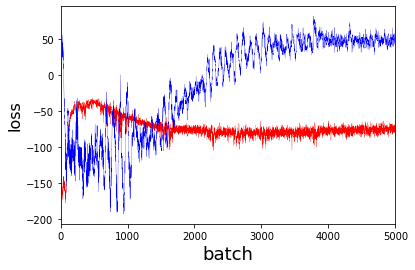

In [0]:
fig = plt.figure()
plt.plot(gan.d_losses, color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='blue', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 5000)
# plt.ylim(0, 2)

plt.show()

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

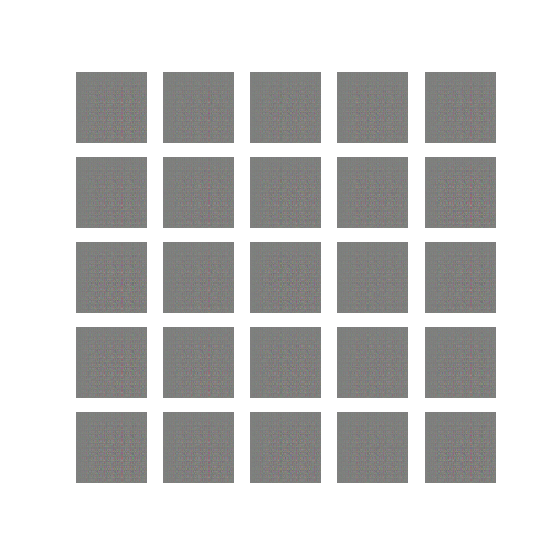

In [0]:
img = mpimg.imread('run/gan/0003_celeb/images/sample_0.png')
plt.subplots(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()

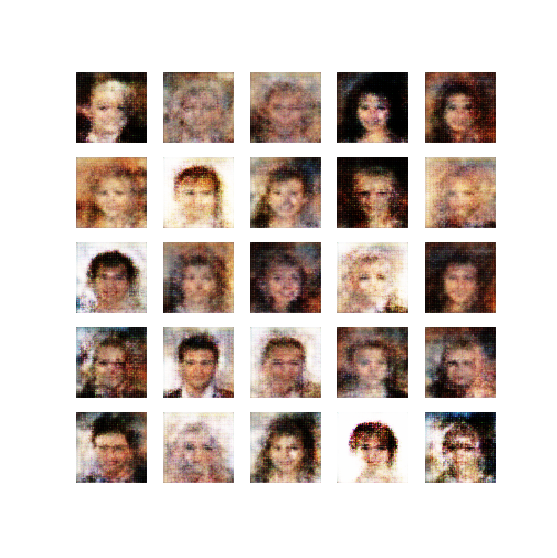

In [0]:
img = mpimg.imread('run/gan/0003_celeb/images/sample_1500.png')
plt.subplots(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()

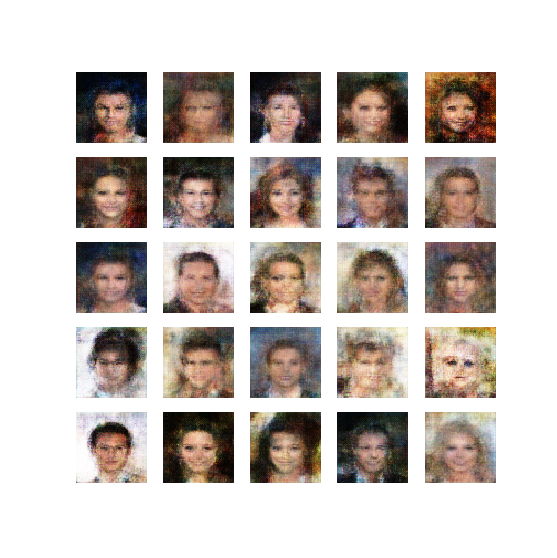

In [0]:
img = mpimg.imread('run/gan/0003_celeb/images/sample_3000.png')
plt.subplots(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()

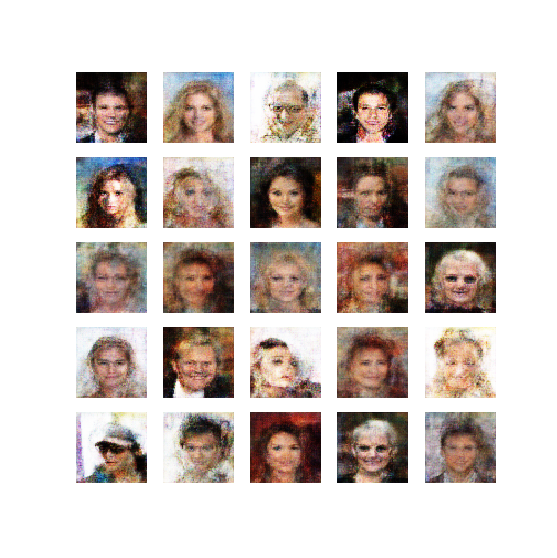

In [0]:
img = mpimg.imread('run/gan/0003_celeb/images/sample_4900.png')
plt.subplots(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()